In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import random 
import math
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
# sklearn.metrics has a bunch of really handy evaluation functions
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn import datasets
import seaborn as sns

In [ ]:
#QUESTION 4 

#A)Given there are some set of observations, with p=1. X is uniformly distributed between [0,1]. Lets create a pattern and see how we fare: To predict response for a test observation, with X=0.1, use observations in range [0.05,0.15]. To predict response for a test observation, with X=0.6, use observations in range [0.55,0.65]. To predict response for a test observation, with X=0.99, use observations in range [0.94,1.04]. 10% of observations from interval of length 1 fall into interval of length 0.1


#B) Assuming X1 and X2 to be independant, the fraction of available observations we will use to make the prediction is 10% * 10% = 1

#C) 10 % = 0.01^100 = 1.e-100 ~= 0. 

#D) We can see from part A and part B that as we increase the dimensions we exponentially reduce the number of observations near the point in consideration. Hence a drawback of KNN when p is large is that there are very few training observations around any given test observation.

#E) For p=1 we have length =0.1. For p=2, we have length =0.1^1/2 and for p=100, we have length=0.1^1/100.

In [1]:
#QUESTION 6

#A) P(x) = e^(Bo+B1X1+B2X2) / 1 + e^(Bo+B1X1+B2X2). Pluggin in the values where Bo = -6, B1=0.05, B2 = 1, P(x) = 0.38

#B) P(x) = e^(Bo+B1X1+B2X2) / 1 + e^(Bo+B1X1+B2X2) 
#   e^(-6+ 0.05X1 + 1(3.5)) / 1 + e^(-6 + 0.05X1 + 1(3.5)) = 0.5
#   taking Log of boths side we get X1 = 50 

In [ ]:
#QUESTION 9

#A)  P(x)/1+P(x) = 0.37/(1+0.37) = 0.27

#B) 0.16/1-0.16 = 0.19

In [43]:
#QUESTION 12

#A)

def Power(): 
    Power = math.pow(2,3)
    print(Power)
Power()



8.0


In [48]:
#B)
def Power2(x,a):
    res = x**a
    return res;
Power2(3,8)

6561

In [51]:
#C)

Power2(10,3)


1000

In [52]:
#C)
Power2(8,17)


2251799813685248

In [53]:
#C)
Power2(131,3)

2248091

In [60]:
#D)
def Power3(x,a):
    return x**a
result = Power3(2,3)
print(result)



8


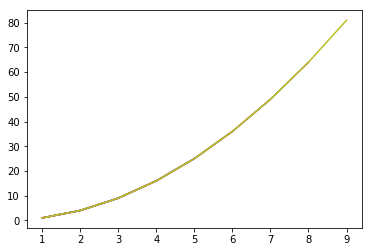

In [76]:
#E)
A1,A2 =[],[]
for x in range(1, 10):
    A1.append(x)
    A2.append(Power3(x,2))
    plt.plot(A1, A2) 
plt.show()

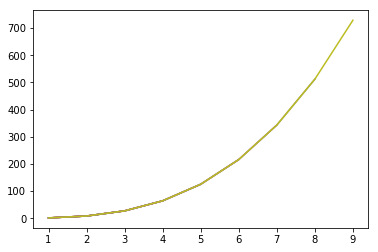

In [81]:
#F)
A1,A2 =[],[]
def PlotPower(x,a):
    return x**a

for x in range(1, 10):
        A1.append(x)
        A2.append(PlotPower(x,3))
        plt.plot(A1, A2) 
plt.show()

In [210]:
#QUESTION 13

with open('E:/UChicago Courses/Autumn Quarter 2017/Machine Learning/Assignments/HW3/Boston.csv', newline ='') as data:
        df = pd.read_csv(data, index_col=0, parse_dates=True)
        print(df)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
1     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
2     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
3     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
4     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
5     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
6     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
7     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
8     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
9     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
10    0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
11    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
12    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
13    0.09378  12.5   7.8

In [216]:
# LOGISTIC REGRESSION 


crimlen = len(df.CRIM) 
x = np.zeros(crimlen) 
med = np.median(df.CRIM)

x[df.CRIM > med] =1


In [212]:
df2 = pd.DataFrame(x, columns = ['CRIM01'])
print(df2)

     CRIM01
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
..      ...
476     1.0
477     1.0
478     1.0
479     1.0
480     1.0
481     1.0
482     1.0
483     1.0
484     1.0
485     1.0
486     1.0
487     1.0
488     0.0
489     0.0
490     0.0
491     0.0
492     0.0
493     0.0
494     1.0
495     0.0
496     1.0
497     1.0
498     0.0
499     0.0
500     0.0
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0

[506 rows x 1 columns]


In [218]:

df.loc[:, 'CRIM01'] = df2.loc[:,'CRIM01']
df = df.fillna(0)  
print(df)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
1     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
2     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
3     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
4     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
5     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
6     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
7     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
8     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
9     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
10    0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
11    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
12    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
13    0.09378  12.5   7.8

In [225]:
formula = 'CRIM01 ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + BLACK + LSTAT + MEDV'
glm = smf.glm(formula=formula, data=df, family=sm.families.Binomial()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 CRIM01   No. Observations:                  506
Model:                            GLM   Df Residuals:                      492
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -129.97
Date:                Wed, 18 Oct 2017   Deviance:                       259.93
Time:                        15:16:47   Pearson chi2:                     546.
No. Iterations:                    11                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -25.4463      5.388     -4.723      0.000       -36.007   -14.886
ZN             0.0027      0.014      0.187      0.852        -0.026     0.031
INDUS         -0.0474      0.040     -1.187      0.235        -0.126     0.031
CHAS           1.7229      0.606      2.845      0.004         0.536     2.910
NOX           40.4492      6.337      6.383      0.000        28.030    52.869
RM            -0.8288      0.593     -1.399      0.162        -1.990     0.333
AGE            0.0245      0.011      2.298      0.022         0.004     0.045
DIS            0.4520      0.166      2.721      0.007         0.126     0.778
RAD            0.3374      0.091      3.708      0.000         0.159     0.516
TAX           -0.0056      0.002     -2.328      0.020        -0.010    -0.001
PTRATIO        0.3818      0.106      3.590      0.000         0.173     0.590
BLACK         -0.0108      0.005     -2.031      0.042        -0.021    -0.000
LSTAT         -0.0347      0.045     -0.770      0.442        -0.123     0.054
MEDV           0.1381      0.055      2.533      0.011         0.031     0.245
==============================================================================
"""

In [226]:
print(glm.params)

Intercept   -25.446276
ZN            0.002700
INDUS        -0.047369
CHAS          1.722924
NOX          40.449218
RM           -0.828758
AGE           0.024548
DIS           0.451997
RAD           0.337416
TAX          -0.005563
PTRATIO       0.381842
BLACK        -0.010793
LSTAT        -0.034650
MEDV          0.138059
dtype: float64
